In [1]:
import re
from ast import literal_eval
import numpy as np

In [3]:
filter = 'red'
with open(f'RZ_CepData{filter.upper()}.txt', 'r') as file:
    red_string = file.read()

data_red = re.split(r'\*+', red_string)
red_phase_string = data_red[1]
red_mags_string = data_red[2]
red_error_string = data_red[3]
red_julian_dates_string = data_red[4]
red_fluxes_string = data_red[5]
red_fluxes_error_string = data_red[6]

red_bad_indexes = [47, 79]

red_phase = np.array(literal_eval(re.sub('\s+', ',',red_phase_string.strip('\n'))))
red_mags = np.array(eval(re.sub('\s+', ',',red_mags_string.strip('\n').replace('nan', 'np.nan'))))
red_error = np.array(eval(re.sub('\s+', ',',red_error_string.strip('\n').replace('nan', 'np.nan')))[0])
red_julian_date = np.array(eval(re.sub('\s+', ',',red_julian_dates_string.strip('\n').replace('nan', 'np.nan'))))
red_fluxes = np.array(eval(re.sub('\s+', ',',red_fluxes_string.strip('\n').replace('nan', 'np.nan'))))
red_fluxes_error = 2 * red_error*np.log(10)*red_fluxes/5

red_no_outliers_phase = red_phase
red_no_outliers_phase[red_bad_indexes] = np.nan

red_no_outliers_mags = red_mags
red_no_outliers_mags[red_bad_indexes] = np.nan

red_no_outliers_error = red_error
red_no_outliers_error[red_bad_indexes] = np.nan

red_no_outliers_julian_date = red_julian_date
red_no_outliers_julian_date[red_bad_indexes] = np.nan

red_no_outliers_fluxes = red_fluxes
red_no_outliers_fluxes[red_bad_indexes] = np.nan

red_no_outliers_fluxes_error = red_fluxes_error
red_no_outliers_fluxes_error[red_bad_indexes] = np.nan


red_weights = 1/np.array(red_no_outliers_fluxes_error)**2

weighted_mag = 25 - 2.5*np.log10(np.nansum(red_weights * np.array(red_no_outliers_fluxes))/ np.nansum(red_weights))

print(weighted_mag, 5/(np.log(10)*weighted_mag)*1/np.sqrt(np.nansum(red_weights)))

14.047653632445098 0.687603223244608


In [6]:
filter = 'blue'
with open(f'RZ_CepData{filter.upper()}.txt', 'r') as file:
    blue_string = file.read()

data_blue = re.split(r'\*+', blue_string)
blue_phase_string = data_blue[1]
blue_mags_string = data_blue[2]
blue_error_string = data_blue[3]
blue_julian_dates_string = data_blue[4]
blue_fluxes_string = data_blue[5]
blue_fluxes_error_string = data_blue[6]

blue_bad_indexes = [49, 76, 77, 80, 81]

blue_phase = np.array(literal_eval(re.sub('\s+', ',',blue_phase_string.strip('\n'))))
blue_mags = np.array(eval(re.sub('\s+', ',',blue_mags_string.strip('\n').replace('nan', 'np.nan'))))
blue_error = np.array(eval(re.sub('\s+', ',',blue_error_string.strip('\n').replace('nan', 'np.nan')))[0])
blue_julian_date = np.array(eval(re.sub('\s+', ',',blue_julian_dates_string.strip('\n').replace('nan', 'np.nan'))))
blue_fluxes = np.array(eval(re.sub('\s+', ',',blue_fluxes_string.strip('\n').replace('nan', 'np.nan'))))
blue_fluxes_error = 2 * blue_error*np.log(10)*blue_fluxes/5

blue_no_outliers_phase = blue_phase
blue_no_outliers_phase[blue_bad_indexes] = np.nan

blue_no_outliers_mags = blue_mags
blue_no_outliers_mags[blue_bad_indexes] = np.nan

blue_no_outliers_error = blue_error
blue_no_outliers_error[blue_bad_indexes] = np.nan

blue_no_outliers_julian_date = blue_julian_date
blue_no_outliers_julian_date[blue_bad_indexes] = np.nan

blue_no_outliers_fluxes = blue_fluxes
blue_no_outliers_fluxes[blue_bad_indexes] = np.nan

blue_no_outliers_fluxes_error = blue_fluxes_error
blue_no_outliers_fluxes_error[blue_bad_indexes] = np.nan


blue_weights = 1/np.array(blue_no_outliers_fluxes_error)**2

weighted_mag = 25 - 2.5*np.log10(np.nansum(blue_weights * np.array(blue_no_outliers_fluxes))/ np.nansum(blue_weights))

print(weighted_mag, 5/(np.log(10)*weighted_mag)*1/np.sqrt(np.nansum(blue_weights)))

14.183040604356075 0.6175317471057203


In [10]:
filter = 'green'
with open(f'RZ_CepData{filter.upper()}.txt', 'r') as file:
    green_string = file.read()

green_bad_indexes = [57, 59, 62, 63, 64, 66, 69, 71, 74, 79, 80]

data_green = re.split(r'\*+', green_string)
green_phase_string = data_green[1]
green_mags_string = data_green[2]
green_error_string = data_green[3]
green_julian_dates_string = data_green[4]
green_fluxes_string = data_green[5]
green_fluxes_error_string = data_green[6]

green_phase = np.array(literal_eval(re.sub('\s+', ',',green_phase_string.strip('\n'))))
green_mags = np.array(eval(re.sub('\s+', ',',green_mags_string.strip('\n').replace('nan', 'np.nan'))))
green_error = np.array(eval(re.sub('\s+', ',',green_error_string.strip('\n').replace('nan', 'np.nan')))[0])
green_julian_date = np.array(eval(re.sub('\s+', ',',green_julian_dates_string.strip('\n').replace('nan', 'np.nan'))))
green_fluxes = np.array(eval(re.sub('\s+', ',',green_fluxes_string.strip('\n').replace('nan', 'np.nan'))))
green_fluxes_error = 2 * green_error*np.log(10)*green_fluxes/5

green_no_outliers_phase = green_phase
green_no_outliers_phase[green_bad_indexes] = np.nan

green_no_outliers_mags = green_mags
green_no_outliers_mags[green_bad_indexes] = np.nan

green_no_outliers_error = green_error
green_no_outliers_error[green_bad_indexes] = np.nan

green_no_outliers_julian_date = green_julian_date
green_no_outliers_julian_date[green_bad_indexes] = np.nan

green_no_outliers_fluxes = green_fluxes
green_no_outliers_fluxes[green_bad_indexes] = np.nan

green_no_outliers_fluxes_error = green_fluxes_error
green_no_outliers_fluxes_error[green_bad_indexes] = np.nan


green_weights = 1/np.array(green_no_outliers_fluxes_error)**2

weighted_mag = 25 - 2.5*np.log10(np.nansum(green_weights * np.array(green_no_outliers_fluxes))/ np.nansum(green_weights))

print(weighted_mag, 5/(np.log(10)*weighted_mag)*1/np.sqrt(np.nansum(green_weights)))

14.148106651569428 0.6792551599322723


In [11]:
filter = 'luminance'
with open(f'RZ_CepData{filter.upper()}.txt', 'r') as file:
    luminance_string = file.read()

luminance_bad_indexes = [138, 149]

data_luminance = re.split(r'\*+', luminance_string)
luminance_phase_string = data_luminance[1]
luminance_mags_string = data_luminance[2]
luminance_error_string = data_luminance[3]
luminance_julian_dates_string = data_luminance[4]
luminance_fluxes_string = data_luminance[5]
luminance_fluxes_error_string = data_luminance[6]

luminance_phase = np.array(literal_eval(re.sub('\s+', ',',luminance_phase_string.strip('\n'))))
luminance_mags = np.array(eval(re.sub('\s+', ',',luminance_mags_string.strip('\n').replace('nan', 'np.nan'))))
luminance_error = np.array(eval(re.sub('\s+', ',',luminance_error_string.strip('\n').replace('nan', 'np.nan')))[0])
luminance_julian_date = np.array(eval(re.sub('\s+', ',',luminance_julian_dates_string.strip('\n').replace('nan', 'np.nan'))))
luminance_fluxes = np.array(eval(re.sub('\s+', ',',luminance_fluxes_string.strip('\n').replace('nan', 'np.nan'))))
luminance_fluxes_error = 2 * luminance_error*np.log(10)*luminance_fluxes/5


luminance_no_outliers_phase = luminance_phase
luminance_no_outliers_phase[luminance_bad_indexes] = np.nan

luminance_no_outliers_mags = luminance_mags
luminance_no_outliers_mags[luminance_bad_indexes] = np.nan

luminance_no_outliers_error = luminance_error
luminance_no_outliers_error[luminance_bad_indexes] = np.nan

luminance_no_outliers_julian_date = luminance_julian_date
luminance_no_outliers_julian_date[luminance_bad_indexes] = np.nan

luminance_no_outliers_fluxes = luminance_fluxes
luminance_no_outliers_fluxes[luminance_bad_indexes] = np.nan

luminance_no_outliers_fluxes_error = luminance_fluxes_error
luminance_no_outliers_fluxes_error[luminance_bad_indexes] = np.nan


luminance_weights = 1/np.array(luminance_no_outliers_fluxes_error)**2

weighted_mag = 25 - 2.5*np.log10(np.nansum(luminance_weights * np.array(luminance_no_outliers_fluxes))/ np.nansum(luminance_weights))

print(weighted_mag, 5/(np.log(10)*weighted_mag)*1/np.sqrt(np.nansum(luminance_weights)))

14.209971103569181 0.5135585197933703


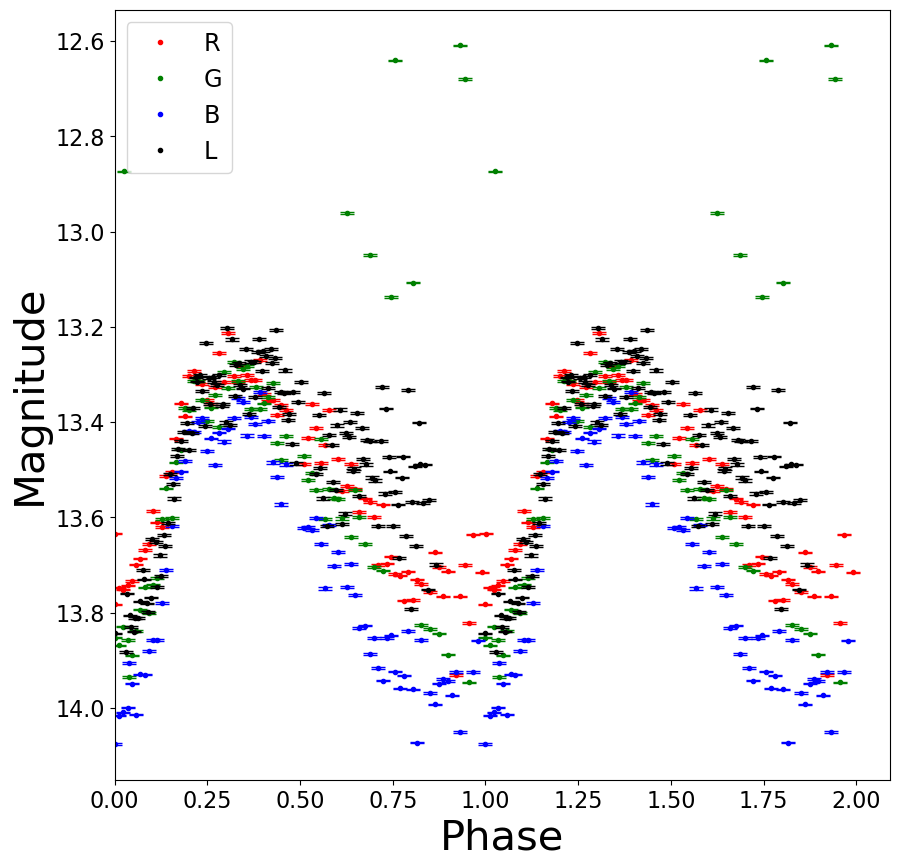

In [15]:
import matplotlib.pyplot as plt
plt.style.use('guide.mplstyle')


plt.plot(red_phase, red_mags, '.', color = 'red', label = 'R')
plt.errorbar(red_phase, red_mags, yerr = red_error, color = 'red', capsize = 5, fmt = 'none')
plt.plot(1+red_phase, red_mags, '.', color = 'red')
plt.errorbar(1+red_phase, red_mags, yerr = red_error, color = 'red', capsize = 5, fmt = 'none')

plt.plot(green_phase, green_mags, '.', color = 'green', label = 'G')
plt.errorbar(green_phase, green_mags, yerr = green_error, color = 'green', capsize = 5, fmt = 'none')
plt.plot(1+green_phase, green_mags, '.', color = 'green')
plt.errorbar(1+green_phase, green_mags, yerr = green_error, color = 'green', capsize = 5, fmt = 'none')

plt.plot(blue_phase, blue_mags, '.', color = 'blue', label = 'B')
plt.errorbar(blue_phase, blue_mags, yerr = blue_error, color = 'blue', capsize = 5, fmt = 'none')
plt.plot(1+blue_phase, blue_mags, '.', color = 'blue')
plt.errorbar(1+blue_phase, blue_mags, yerr = blue_error, color = 'blue', capsize = 5, fmt = 'none')

plt.plot(luminance_phase, luminance_mags, '.', color = 'black', label = 'L')
plt.errorbar(luminance_phase, luminance_mags, yerr = luminance_error, color = 'black', capsize = 5, fmt = 'none')
plt.plot(1+luminance_phase, luminance_mags, '.', color = 'black')
plt.errorbar(1+luminance_phase, luminance_mags, yerr = luminance_error, color = 'black', capsize = 5, fmt = 'none')

plt.gca().invert_yaxis()
plt.xlim(0,)
plt.legend(loc = 'upper left')
plt.xlabel('Phase', fontdict={'size': 30})
plt.ylabel('Magnitude', fontdict={'size': 30})
plt.savefig('AllFiltersRZCep')

# GAIA Data

In [16]:
from astroquery.gaia import Gaia

In [17]:


def extract_dl_ind(datalink_dict, key, figsize = [15,5], fontsize = 12, linewidth = 2, show_legend = True, show_grid = True):
    ""
    "Extract individual DataLink products and export them to an Astropy Table"
    ""
    dl_out  = datalink_dict[key][0].to_table()
    if 'time' in dl_out.keys():
        plot_e_phot(dl_out, colours  = ['green', 'red', 'blue'], title = 'Epoch photometry', fontsize = fontsize, show_legend = show_legend, show_grid = show_grid, figsize = figsize)
    if 'wavelength' in dl_out.keys():
        if len(dl_out) == 343:  title = 'XP Sampled'
        if len(dl_out) == 2401: title = 'RVS'
        plot_sampled_spec(dl_out, color = 'blue', title = title, fontsize = fontsize, show_legend = False, show_grid = show_grid, linewidth = linewidth, legend = '', figsize = figsize)
    return dl_out


def plot_e_phot(inp_table, colours  = ['green', 'red', 'blue'], title = 'Epoch photometry', fontsize = 12, show_legend = True, show_grid = True, figsize = [15,5]):
    ""
    "Epoch photometry plotter. 'inp_table' MUST be an Astropy-table object."
    ""
    fig      = plt.figure(figsize=figsize)
    xlabel   = f'JD date [{inp_table["time"].unit}]'
    ylabel   = f'magnitude [{inp_table["mag"].unit}]'
    gbands   = ['G', 'RP', 'BP']
    colours  = iter(colours)

    plt.gca().invert_yaxis()
    for band in gbands:
        phot_set = inp_table[inp_table['band'] == band]
        plt.plot(phot_set['time'], phot_set['mag'], 'o', label = band, color = next(colours))
    make_canvas(title = title, xlabel = xlabel, ylabel = ylabel, fontsize= fontsize, show_legend=show_legend, show_grid = show_grid)
    plt.show()


def plot_sampled_spec(inp_table, color = 'blue', title = '', fontsize = 14, show_legend = True, show_grid = True, linewidth = 2, legend = '', figsize = [12,4], show_plot = True):
    ""
    "RVS & XP sampled spectrum plotter. 'inp_table' MUST be an Astropy-table object."
    ""
    if show_plot:
        fig      = plt.figure(figsize=figsize)
    xlabel   = f'Wavelength [{inp_table["wavelength"].unit}]'
    ylabel   = f'Flux [{inp_table["flux"].unit}]'
    plt.plot(inp_table['wavelength'], inp_table['flux'], '-', linewidth = linewidth, label = legend)
    make_canvas(title = title, xlabel = xlabel, ylabel = ylabel, fontsize= fontsize, show_legend=show_legend, show_grid = show_grid)
    if show_plot:
        plt.show()


def make_canvas(title = '', xlabel = '', ylabel = '', show_grid = False, show_legend = False, fontsize = 12):
    ""
    "Create generic canvas for plots"
    ""
    plt.title(title,    fontsize = fontsize)
    plt.xlabel(xlabel,  fontsize = fontsize)
    plt.ylabel(ylabel , fontsize = fontsize)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    if show_grid:
        plt.grid()
    if show_legend:
        plt.legend(fontsize = fontsize*0.75)

In [18]:
query = f"SELECT source_id, ra, dec, pmra, pmdec, parallax \
FROM gaiadr3.gaia_source \
WHERE has_epoch_photometry = 'True' \
AND source_id = 2211629018927324288"


job     = Gaia.launch_job_async(query)
results = job.get_results()
print(f'Table size (rows): {len(results)}')
print(results['dec'])

INFO: Query finished. [astroquery.utils.tap.core]
Table size (rows): 1
       dec       
       deg       
-----------------
64.85935050030417


In [19]:
retrieval_type = 'EPOCH_PHOTOMETRY'          # Options are: 'EPOCH_PHOTOMETRY', 'MCMC_GSPPHOT', 'MCMC_MSC', 'XP_SAMPLED', 'XP_CONTINUOUS', 'RVS', 'ALL'
data_structure = 'INDIVIDUAL'   # Options are: 'INDIVIDUAL', 'COMBINED', 'RAW'
data_release   = 'Gaia DR3'     # Options are: 'Gaia DR3' (default), 'Gaia DR2'


datalink = Gaia.load_data(ids=results['source_id'], data_release = data_release, retrieval_type=retrieval_type, data_structure = data_structure, verbose = False, output_file = None)
dl_keys  = [inp for inp in datalink.keys()]
dl_keys.sort()

print()
print(f'The following Datalink products have been downloaded:')
for dl_key in dl_keys:
    print(f' * {dl_key}')


The following Datalink products have been downloaded:
 * EPOCH_PHOTOMETRY-Gaia DR3 2211629018927324288.xml


In [20]:
dl_key = 'EPOCH_PHOTOMETRY-Gaia DR3 2211629018927324288.xml'

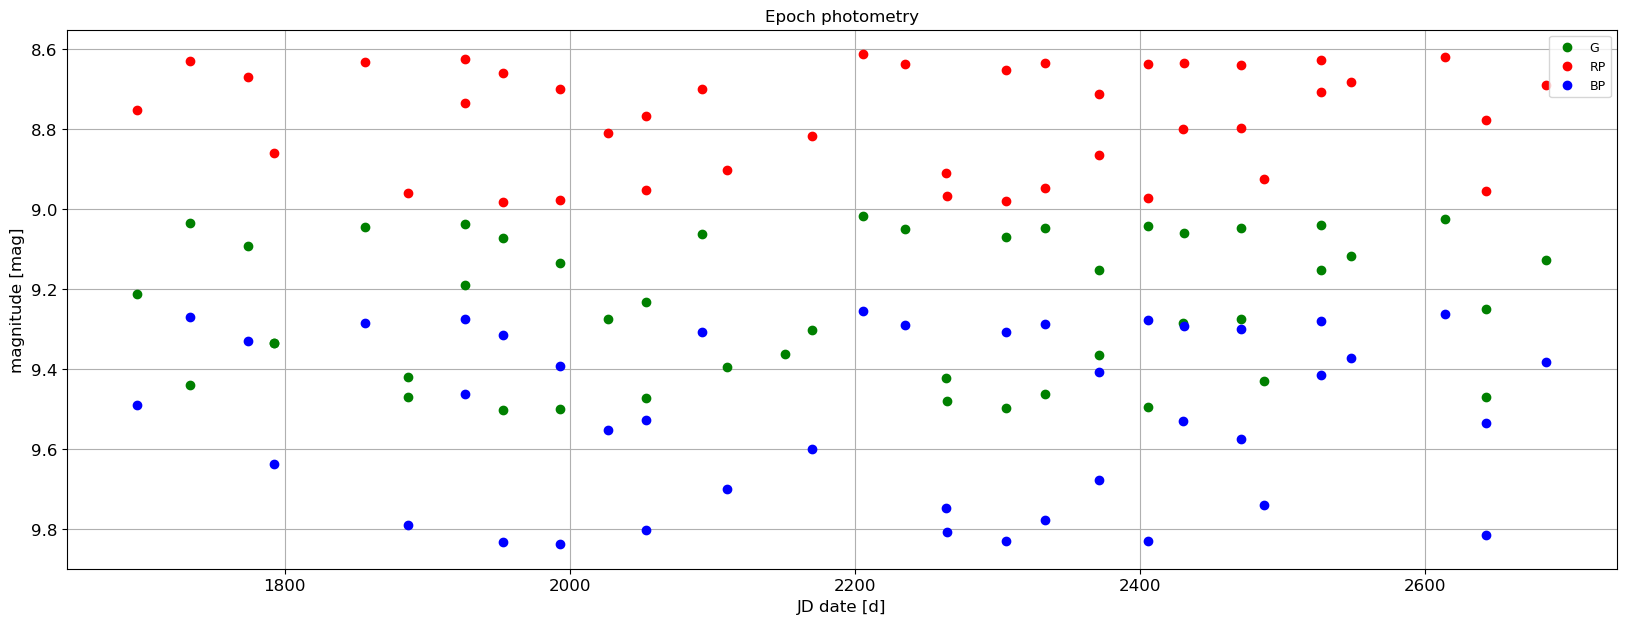

In [21]:
dl_out  = extract_dl_ind(datalink, dl_key, figsize=[20,7])   # Change the figsize to e.g. figsize=[20,7] to increase the size of the displayed image.

In [22]:
product  = datalink[dl_key][0]
prod_tab = product.to_table().to_pandas()

In [23]:
g_filter = prod_tab.where(prod_tab['band'] == 'G').dropna().reset_index(drop = True)
bp_filter = prod_tab.where(prod_tab['band'] == 'BP').dropna().reset_index(drop = True)
rp_filter = prod_tab.where(prod_tab['band'] == 'RP').dropna().reset_index(drop = True)

In [24]:
t_g = g_filter['time']
t_bp = bp_filter['time']
t_rp = rp_filter['time']

In [25]:
import numpy as np

period = 0.30868 # period in days


phase_g  = np.array(t_g)/period - np.floor(np.array(t_g)/period)
phase_bp  = np.array(t_bp)/period - np.floor(np.array(t_bp)/period)
phase_rp  = np.array(t_rp)/period - np.floor(np.array(t_rp)/period)

g_mags = g_filter['mag']
bp_mags = bp_filter['mag']
rp_mags = rp_filter['mag']

In [26]:
luminance_julian_date

array([2459921.33929677, 2459921.34834373, 2459921.34942324,
       2459921.35193722, 2459921.3529812 , 2459921.35550196,
       2459921.35655829, 2459921.35908042, 2459921.36012782,
       2459921.36264317, 2459921.36368683, 2459921.36619639,
       2459921.36724073, 2459921.36976124, 2459921.37079983,
       2459921.37331453, 2459921.37438409, 2459921.37690439,
       2459921.37794688, 2459921.38046733, 2459921.38150391,
       2459921.38402652, 2459921.38507196, 2459921.38759686,
       2459921.38863163, 2459921.39115014, 2459921.39221178,
       2459921.39472652, 2459921.39731014, 2459921.3998191 ,
       2459921.40086839, 2459921.40338391, 2459921.40443877,
       2459921.40696028, 2459921.40800453, 2459921.41051359,
       2459921.41162345, 2459921.41413623, 2459921.41519968,
       2459921.41772424, 2459921.41881259, 2459921.42132373,
       2459921.42237777, 2459921.42488861, 2459921.42593394,
       2459921.42845343, 2459921.42951065, 2459921.43202975,
       2459921.43307817,

Text(0, 0.5, 'Magnitude')

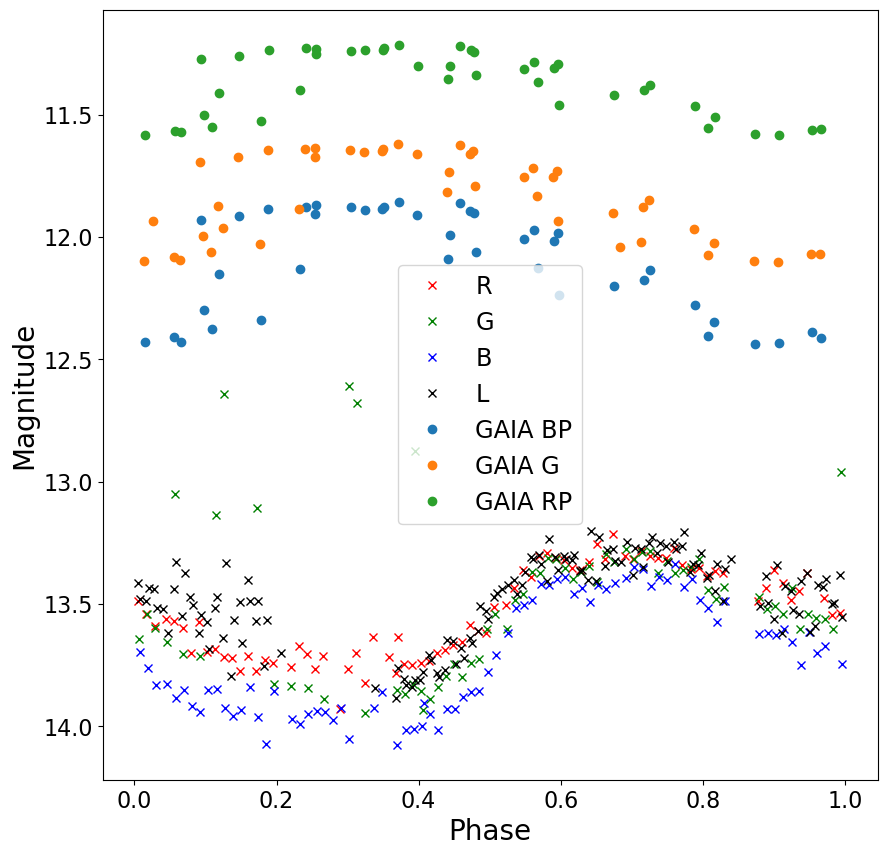

In [27]:
plt.plot(np.array(red_julian_date)/period - np.floor(np.array(red_julian_date)/period), red_mags, 'x', color = 'red', label = 'R')
plt.plot(np.array(green_julian_date)/period - np.floor(np.array(green_julian_date)/period), green_mags, 'x', color = 'green', label = 'G')
plt.plot(np.array(blue_julian_date)/period - np.floor(np.array(blue_julian_date)/period), blue_mags, 'x', color = 'blue', label = 'B')
plt.plot(np.array(luminance_julian_date)/period - np.floor(np.array(luminance_julian_date)/period), luminance_mags, 'x', color = 'black', label = 'L')
plt.plot(phase_bp, bp_mags + 2.6, 'o', label = 'GAIA BP')
plt.plot(phase_g, g_mags + 2.6, 'o', label = 'GAIA G')
plt.plot(phase_rp, rp_mags + 2.6, 'o', label = 'GAIA RP')
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel('Phase')
plt.ylabel('Magnitude')

In [28]:
gaia_offset = (np.nanmax(luminance_mags) - np.nanmax(bp_mags) + np.nanmin(luminance_mags) - np.nanmin(bp_mags) + np.nanmean(luminance_mags) - np.nanmean(bp_mags)) / 3

In [29]:
gaia_offset

3.9863157310660253

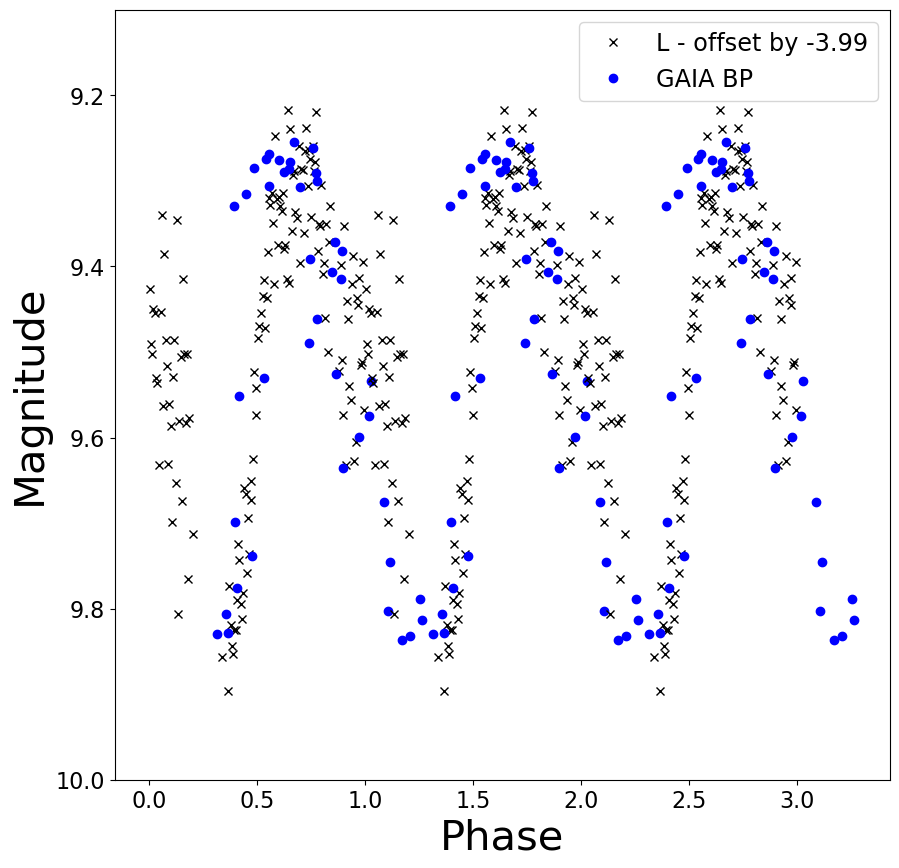

In [31]:

plt.plot(np.array(luminance_julian_date)/period - np.floor(np.array(luminance_julian_date)/period), np.array(luminance_mags) - gaia_offset, 'x', color = 'black', label = f'L - offset by -{gaia_offset:.2f}')
plt.plot(phase_bp + 0.3, bp_mags, 'o', color = 'blue', label = 'GAIA BP')
plt.plot(1+np.array(luminance_julian_date)/period - np.floor(np.array(luminance_julian_date)/period), np.array(luminance_mags) - gaia_offset, 'x', color = 'black')
plt.plot(1.3+phase_bp, bp_mags, 'o',color = 'blue')
plt.plot(2+np.array(luminance_julian_date)/period - np.floor(np.array(luminance_julian_date)/period), np.array(luminance_mags) - gaia_offset, 'x', color = 'black')
plt.plot(2.3+phase_bp, bp_mags, 'o',color = 'blue')
plt.gca().invert_yaxis()
plt.ylim(10, 9.1)
plt.legend()
plt.xlabel('Phase', fontdict={'size': 30})
plt.ylabel('Magnitude', fontdict={'size': 30});
plt.savefig('./Images/GAIA_comparisonRZCep.png')

# Finding the effective temperature

Using the $G_{BP}$ and $G_{RP}$ bands we can find the effective temperature of the star. The relationship, given by this paper (https://www.aanda.org/articles/aa/full_html/2010/15/aa15441-10/aa15441-10.html) is as follows:

$$log(T_{eff}) = 3.999 - 0.654(G_{BP} - G_{RP})+0.709(G_{BP} - G_{RP})^2-0.316(G_{BP} - G_{RP})^3$$

with the error being 0.0416 * T_eff. We can use the average magnitude, but to find it we need to convert it all back to fluxes.

$$ F = 10^{\frac{25-m}{2.5}}$$

In [35]:
bp_fluxes = 10**((25-np.array(bp_mags))/2.5)
rp_fluxes = 10**((25-np.array(rp_mags))/2.5)

mean_bp_flux = np.nanmean(bp_fluxes)
mean_rp_flux = np.nanmean(rp_fluxes)

mean_bp_mag = 25-2.5*np.log10(mean_bp_flux)
mean_rp_mag = 25-2.5*np.log10(mean_rp_flux)

difference_in_mags = mean_bp_mag - mean_rp_mag
log_T = 3.999 - 0.654*difference_in_mags +0.709*difference_in_mags**2-0.316*difference_in_mags**3

T = 10**log_T
delta_T = 0.0416*T
print(f'T = {T:.0f} \u00B1 {delta_T:.0f}')

T = 5989 ± 249


In [36]:
print((2.987e-3/T)*1e9)

498.7110290597229
